In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 

In [44]:
# Import raw data
data = 'train'
raw_df = pd.read_csv('../rawData/' + data + '.csv') 

In [45]:
raw_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Study of price

## Histogram

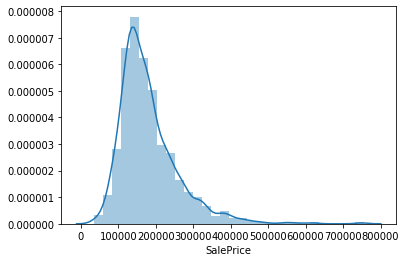

In [46]:
sns.distplot(raw_df['SalePrice'], bins=30)

## Skewness & kurtosis

In [47]:
print("Skewness: %f" % raw_df['SalePrice'].skew())
print("Kurtosis: %f" % raw_df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


## Sale Price as a time serie

In [48]:
# Creating a date sold column
raw_df['SaleDate'] = raw_df[['YrSold', 'MoSold']].apply(lambda x: datetime.date(x[0], x[1], 1), axis = 1)

Trend is from 172565.97 to 156392.23, a -9.37% change.


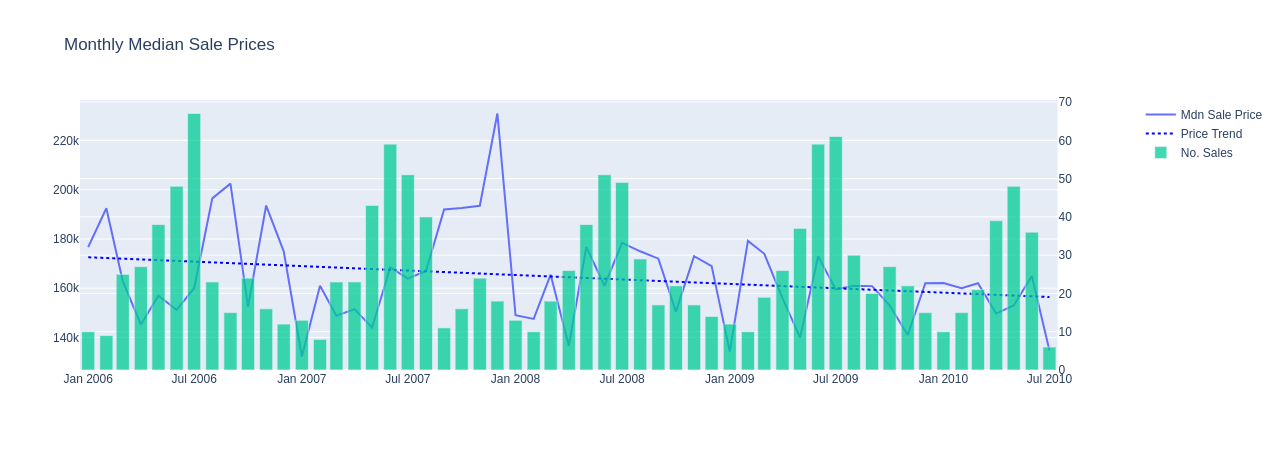

In [49]:
grouped_ts = raw_df.groupby('SaleDate')['SalePrice'].agg(['median', 'count'])
lin = LinearRegression()
x = np.arange((len(grouped_ts.index))).reshape(-1, 1)
lin.fit(x, grouped_ts['median'])
grouped_ts['trend'] = lin.predict(x)
print(f"Trend is from {grouped_ts['trend'][0]:.2f} to {grouped_ts['trend'][-1]:.2f}, a {grouped_ts['trend'][-1]/grouped_ts['trend'][0]-1:.2%} change.")

fig1 = make_subplots(specs=[[{"secondary_y": True}]])
fig1.add_trace(go.Scatter(x=grouped_ts.index, y=grouped_ts['median'], name='Mdn Sale Price'))
fig1.add_trace(go.Scatter(x=grouped_ts.index, y=grouped_ts['trend'], name='Price Trend', line={'color': 'blue', 'dash': 'dot'}))
fig1.add_trace(go.Bar(x=grouped_ts.index, y=grouped_ts['count'], name='No. Sales', opacity=0.75), secondary_y=True,)
fig1.update_layout(
    title='Monthly Median Sale Prices',
    xaxis_title='',
    yaxis_title=''
)

Trend but no saisonality for price, saisonality for nb sales

Trend is from 121.06 to 117.22, a -3.17% change.


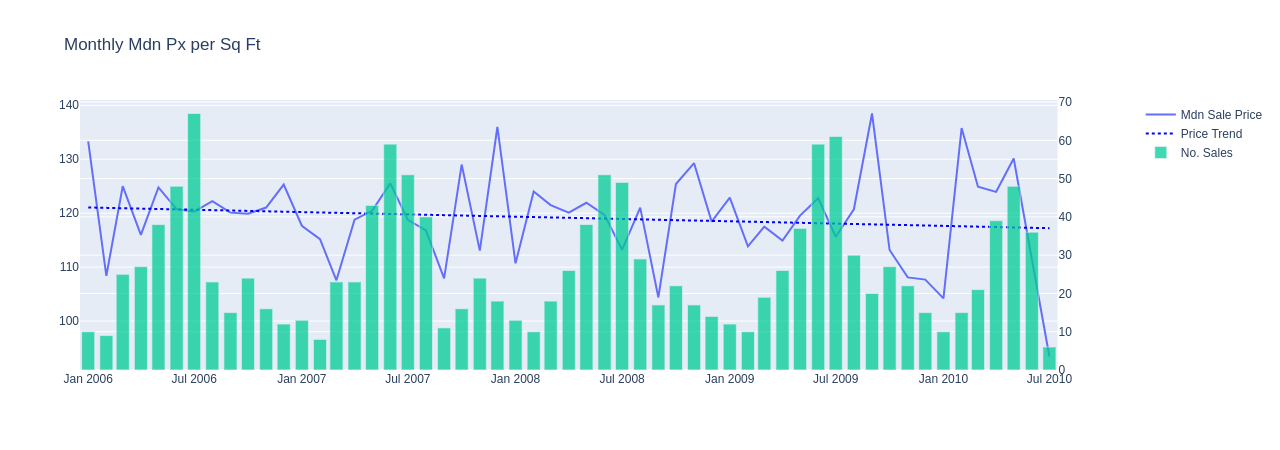

In [50]:
raw_df['SalePxSqFt'] = raw_df['SalePrice'] / raw_df['GrLivArea']
mu_sqft = raw_df['SalePxSqFt'].mean()
grouped_ts2 = raw_df.groupby('SaleDate')['SalePxSqFt'].agg(['median', 'count'])
lin = LinearRegression()
x = np.arange((len(grouped_ts2.index))).reshape(-1, 1)
lin.fit(x, grouped_ts2['median'])
grouped_ts2['trend'] = lin.predict(x)
print(f"Trend is from {grouped_ts2['trend'][0]:.2f} to {grouped_ts2['trend'][-1]:.2f}, a {grouped_ts2['trend'][-1]/grouped_ts2['trend'][0]-1:.2%} change.")

fig2 = make_subplots(specs=[[{"secondary_y": True}]])
fig2.add_trace(go.Scatter(x=grouped_ts2.index, y=grouped_ts2['median'], name='Mdn Sale Price'))
fig2.add_trace(go.Scatter(x=grouped_ts2.index, y=grouped_ts2['trend'], name='Price Trend', line={'color': 'blue', 'dash': 'dot'}))
fig2.add_trace(go.Bar(x=grouped_ts2.index, y=grouped_ts2['count'], name='No. Sales', opacity=0.75), secondary_y=True,)
fig2.update_layout(
    title='Monthly Mdn Px per Sq Ft',
    xaxis_title='',
    yaxis_title=''
)

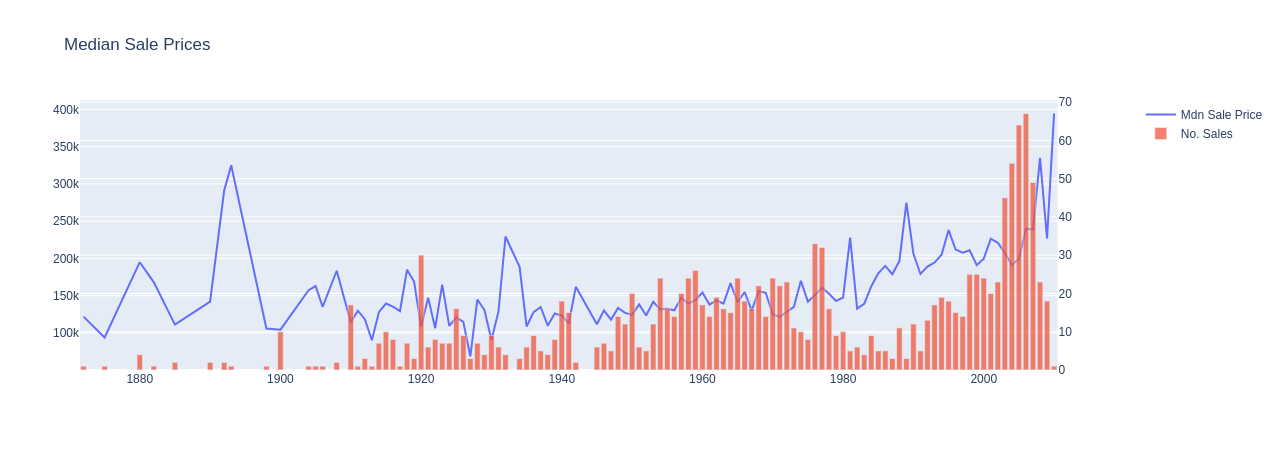

In [51]:
# Creating a variable containing the house age when sold
# raw_df['AgeWSold'] = raw_df[['SaleDate', 'YearBuilt']].apply(lambda d : d[0].year - d[1], axis = 1)

grouped_ts3 = raw_df.groupby('YearBuilt')['SalePrice'].agg(['median', 'count'])

fig1 = make_subplots(specs=[[{"secondary_y": True}]])
fig1.add_trace(go.Scatter(x=grouped_ts3.index, y=grouped_ts3['median'], name='Mdn Sale Price'))
fig1.add_trace(go.Bar(x=grouped_ts3.index, y=grouped_ts3['count'], name='No. Sales', opacity=0.75), secondary_y=True,)
fig1.update_layout(
    title='Median Sale Prices',
    xaxis_title='',
    yaxis_title=''
)

A few observations :
- Small number of sales for very old houses and high variance in that range. Might be coming from the rarity of those houses.
- House price is decreasing with its 'age'
- Number of sales seem to be centered around 2 (or 3?) points. Houses built around 1960 and houses built qround 2005 (third one could be arounf 1920).
    We might want to study the variation of this graph with respect to SaleYear to see if there is any trend.

## Stationarity test

In [52]:
from statsmodels.tsa.stattools import adfuller

X = grouped_ts['median'].values
result = adfuller(X, regression='ct')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.606498
p-value: 0.001006
Critical Values:
	1%: -4.152
	5%: -3.502
	10%: -3.181


In [53]:
X = grouped_ts2['median'].values
result = adfuller(X, regression='ct')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.571174
p-value: 0.001152
Critical Values:
	1%: -4.161
	5%: -3.506
	10%: -3.183


For both time series, ADF test has a p-value < .05. We reject the null hypothesis of non-stationarity

## QQ plot

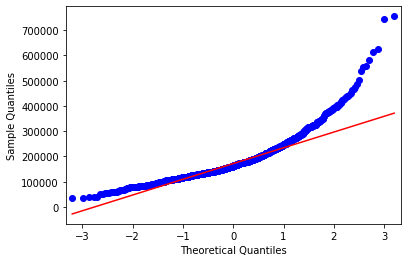

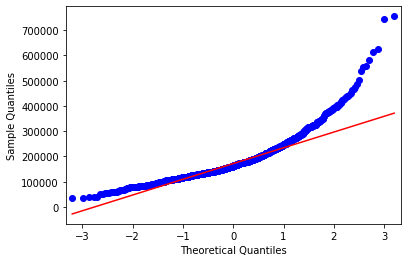

In [41]:
sm.qqplot(raw_df['SalePrice'], line='q')

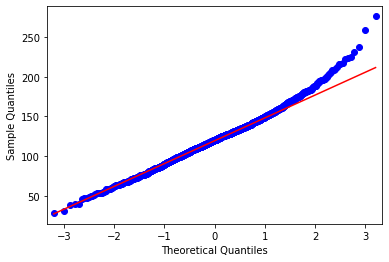

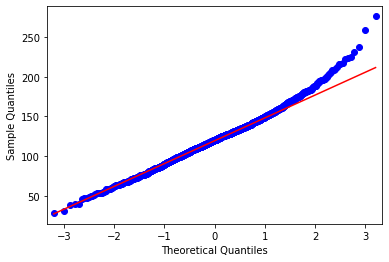

In [57]:
sm.qqplot(raw_df['SalePxSqFt'], line='q')

# How the price depends on different continuous features

In [9]:
contin = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
        'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal']

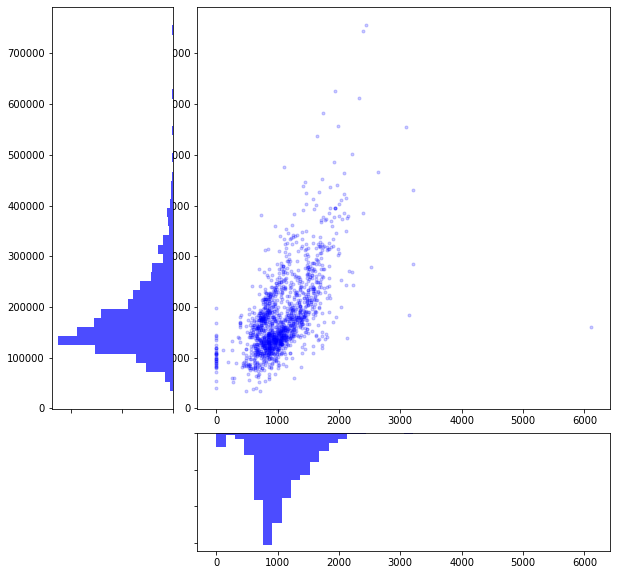

In [10]:
var = 'TotalBsmtSF'

# Set up the axes with gridspec
fig = plt.figure(figsize=(10, 10))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(raw_df[var], raw_df['SalePrice'], 'ok', markersize=3, alpha=0.2, color='blue')

# histogram on the attached axes
x_hist.hist(raw_df[var], 40, histtype='stepfilled',
            orientation='vertical', color='blue', alpha = .7)
x_hist.invert_yaxis()

y_hist.hist(raw_df['SalePrice'], 40, histtype='stepfilled',
            orientation='horizontal', color='blue', alpha = .7)
y_hist.invert_xaxis()

# How the price depends on categorical features

In [11]:
categ = ['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath',
        'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
        'Fireplaces', 'GarageYrBlt', 'GarageCars', 
        'MSSubClass', 'MSZoning', 'Street', 'Alley',
        'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
        'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'GarageType',
        'MiscFeature', 'SaleType', 'SaleCondition']

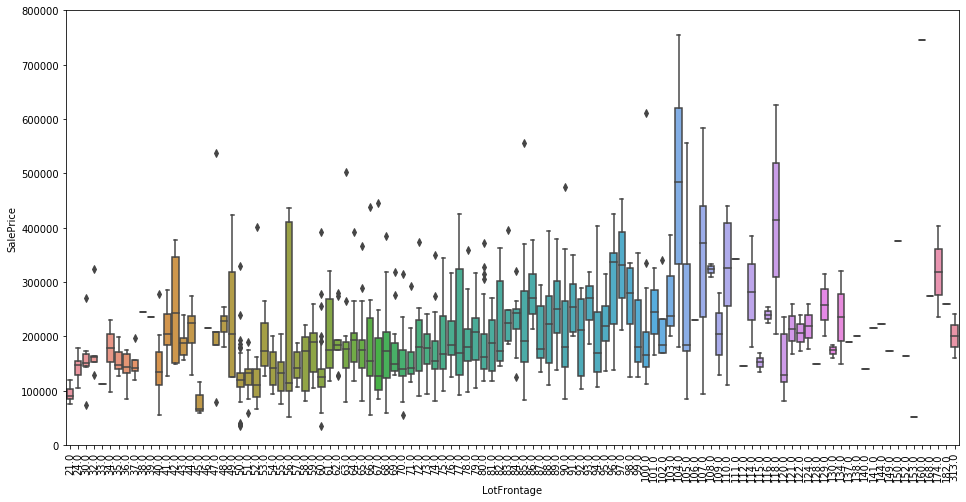

In [15]:
var = 'Heating'

data = pd.concat([raw_df['SalePrice'], raw_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

# How numerical features are correlated ?

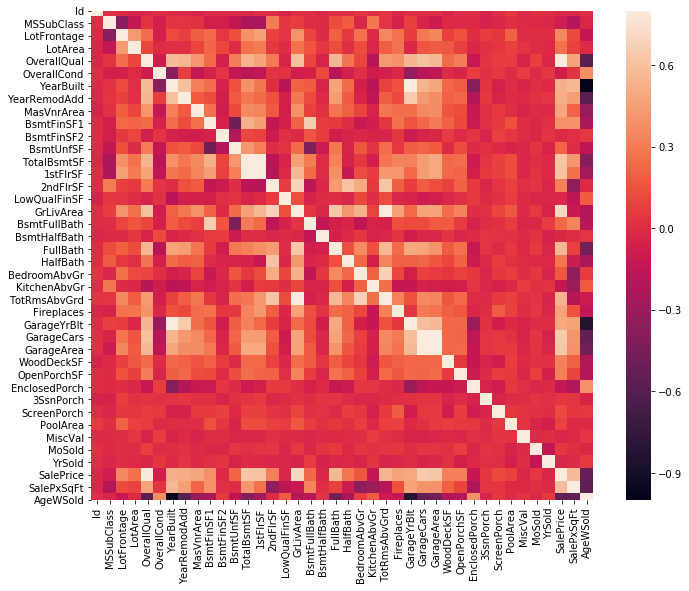

In [282]:
#correlation matrix
corrmat = raw_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# What about missing data ?

## Locating NA's

In [21]:
total = raw_df.isnull().sum().sort_values(ascending=False)
percent = (raw_df.isnull().sum()/raw_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [315]:
missing_data[missing_data['Total'] > 0].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageQual', 'GarageFinish', 'GarageYrBlt', 'GarageType', 'GarageCond',
       'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')

PoolQC, MiscFeature and Alley are almost empty. We don't loose much information by droping them

## LotFrontage

NameError: name 'figure' is not defined